In [1]:
import geopandas as gpd

# 데이터 로드

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [4]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

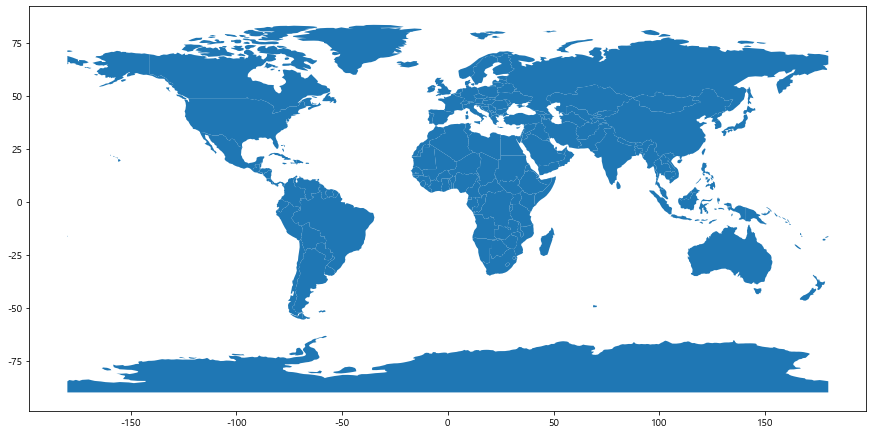

In [8]:
world.plot(figsize=(15, 13))

In [5]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


<AxesSubplot:>

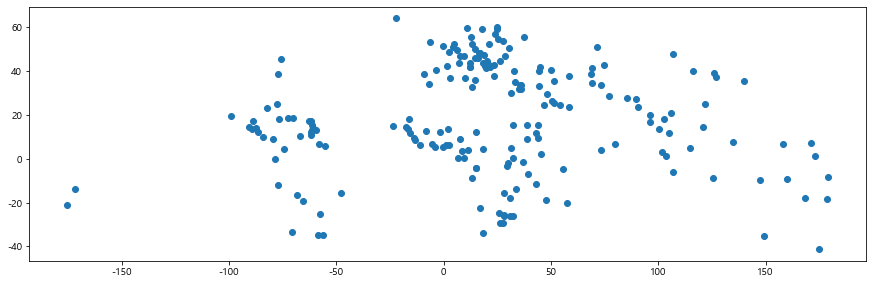

In [9]:
# Point로 되어 있기 때문에 점의 형태로 구성
cities.plot(figsize=(15, 13))

- 일반적으로 matplotlib에서 사용할 수 있는 plot 메소드(선, 스타일 옵션 등)를 geopandas 내에서 사용 가능

# 단계구분도
- geopandas는 쉽게 단계구분도 또한 만들수 있다.
- 단계구분도란 각 모양의 색이 연관된 변수의 값에 기초하는 지도
- 색상을 할당하는 데 사용할 열 인수가 열로 설정된 상태에서 plot 명령을 사용하면 가능

In [11]:
world.head(3)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


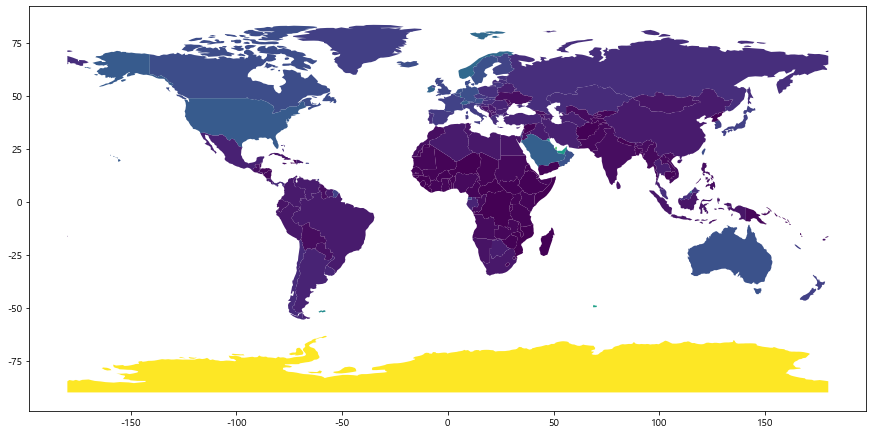

In [15]:
# world 테이블에 대해 boolean indexing
world = world[(world.pop_est>0) & (world.name!='Antartica')]

world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
# plot 명령에 단계구분도를 작성할 컬럼을 지정
world.plot(column='gdp_per_cap', figsize = (15, 13));

## 범례 생성

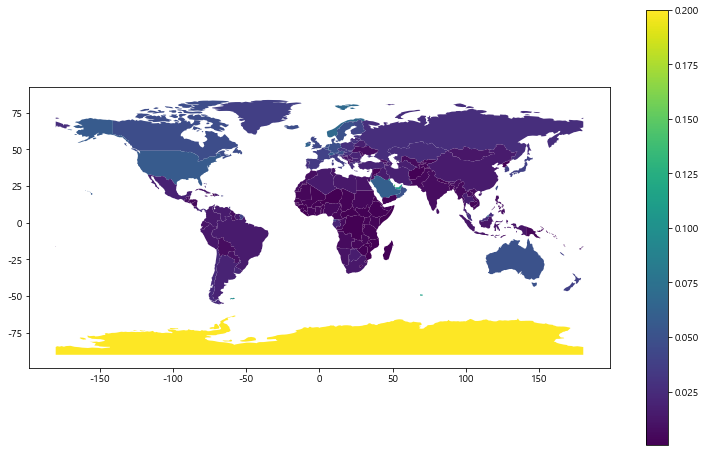

In [21]:
import matplotlib.pyplot as plt

# ax생성은 굳이 하지 않아도 가능
fig, ax = plt.subplots(1,1, figsize=(13, 8))

world.plot(column='gdp_per_cap', ax=ax, legend=True);

- 위에서 보듯이 color bar의 크기가 지도의 크기와 맞지 않을 수 있다.
- 지도의 축과 color bar의 축을 정의하여 plot 메소드에 전달할 수 있다.
- mpl_toolkit를 사용하여 plot ax와 color bar ax를 수직으로 정렬할 수 있다.

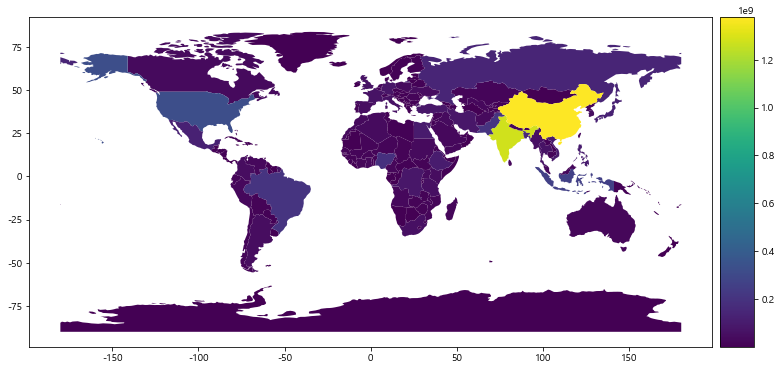

In [30]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1,1, figsize=(13, 8))

divider = make_axes_locatable(ax)

# cax에서 color bar의 설정을 바꿀 수 있다.
# 'right'는 color bar의 위치를 오른쪽으로 설정하는 것이며
# size는 color bar의 너비를 설정
# pad는 color bar와 plot의 여백을 설정함
cax = divider.append_axes('right',size='5%', pad=0.1)

world.plot(column='pop_est', ax=ax, legend=True, cax=cax);

legend_kwds를 사용하면 color bar의 위치를 지도 아래로 설정할수 있으며 또한 lable도 설정할 수 있다.

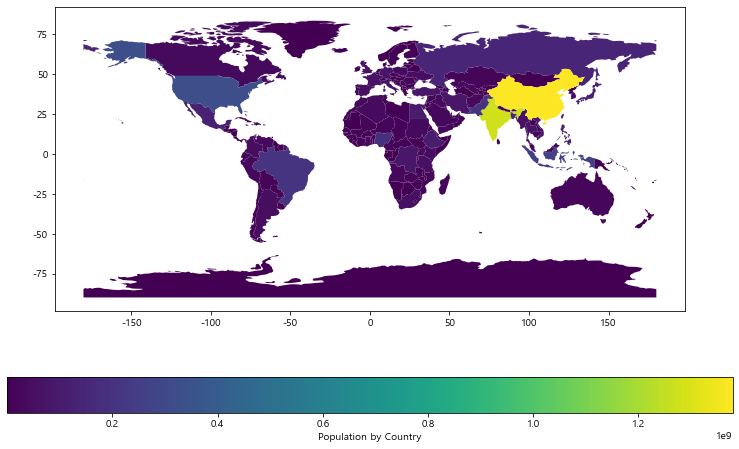

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(13, 8))

world.plot(column='pop_est',
           ax=ax,
           legend=True,
           legend_kwds={'label':'Population by Country',
                        'orientation':'horizontal'});

## 색상 설정하기
- geopandas는 cmap 설정을 통해 plot의 색상을 조정할 수 있다.

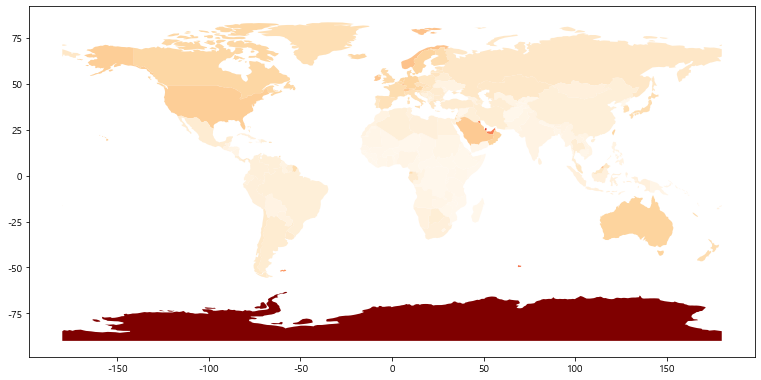

In [33]:
world.plot(column='gdp_per_cap', figsize=(13, 8), cmap='OrRd');

- 만약 지도의 테두리만 표시하고 싶다면 두 가지 옵션을 사용할 수 있다.
    1. `world.plot(facecolor='none', edgecolor='k')` 이렇게 사용할 수 있지만 이는 많은 혼동을 줄 수 있다.
    2. `boundary.plot()`을 사용하면 첫번째 옵션보다 더욱더 명확하게 표현할 수 있다.

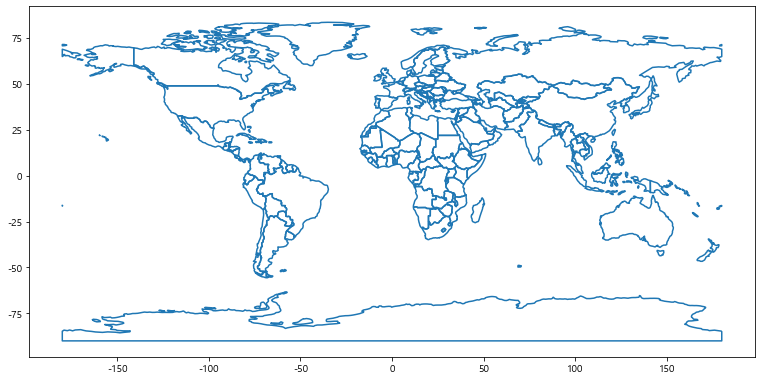

In [35]:
world.boundary.plot(figsize=(13, 8));

- 색상 맵의 크기를 조정하는 것에는 scheme 옵션을 사용하는 방법도 있다.
- scheme 옵션에는 'box_plot', 'equal_interval', 'fisher_jenks', 'headtail_breaks', 'jenks_caspall', 'jenks_caspall_fall', 'max_p'등이 있다.
- scheme 옵션에 대한 설명은 [mapclassify](https://pysal.org/mapclassify/)를 참고

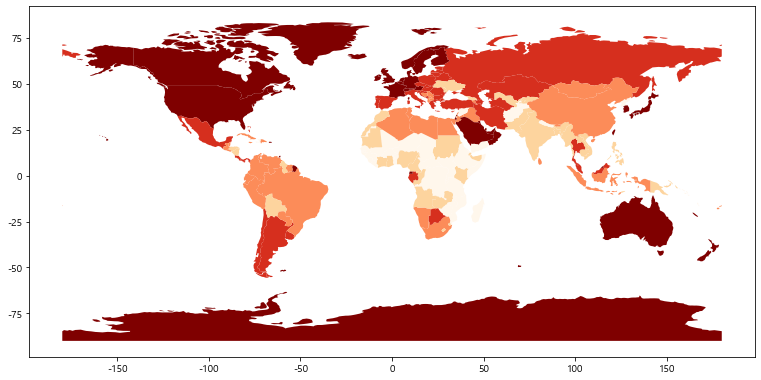

In [38]:
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles',figsize=(13, 8));

## 결측치
- geopandas는 결측치를 포함한 데이터 또한 시각화할 수 있다.

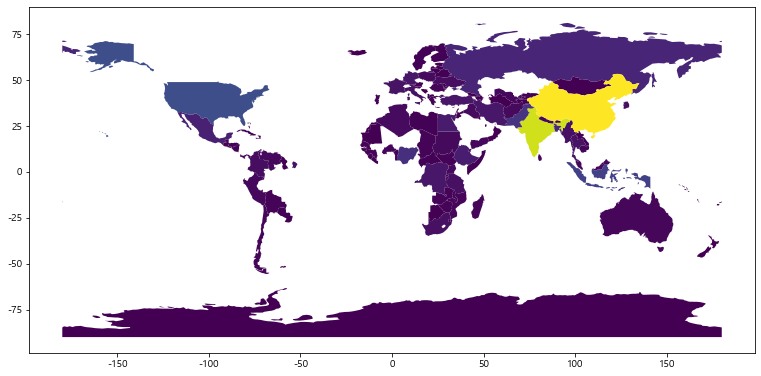

In [40]:
import numpy as np

world.loc[np.random.choice(world.index, 40), 'pop_est'] = np.nan

world.plot(column='pop_est', figsize=(13,8));

- missing_kwds를 사용하면 NaN을 포함한 시각화나 NaN의 레이블 값을 지정할 수 있다.

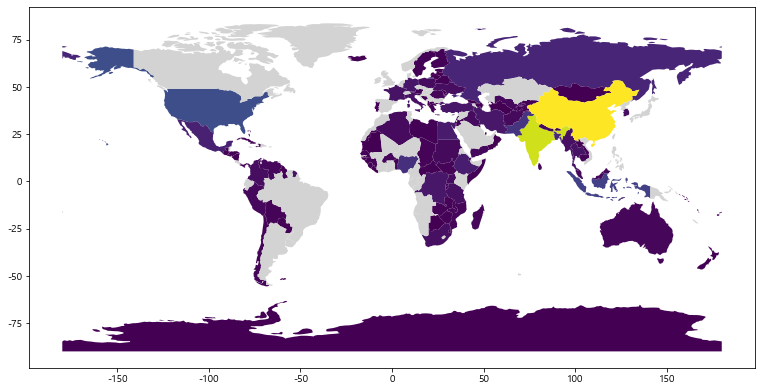

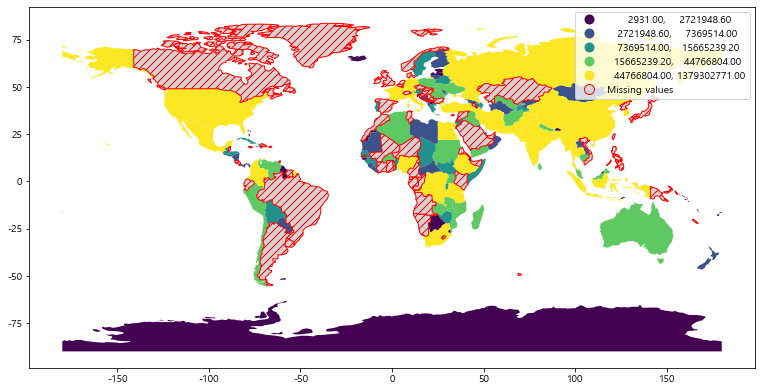

In [42]:
world.plot(column='pop_est', figsize=(13, 8), missing_kwds={'color':'lightgray'});

world.plot(
        column='pop_est',
        legend=True,
        scheme='quantiles',
        figsize=(13, 8),
        missing_kwds={
                'color':'lightgrey',
                'edgecolor':'red',
                'hatch':'///',
                'label':'Missing values'
        });

- 만약 x 축, y 축 배경이 신경쓰인다면 `set_axis_off()`이나 `axis("off")` 옵션을 설정할 수 있다.

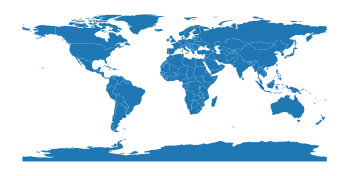

In [43]:
ax = world.plot()
ax.set_axis_off()

# 레이어를 포함한 시각화
- 여러 레이어로 지도를 만드는 것엔 두 가지 방법이 있다.
- 첫 번째는 간결하게 만들 수 있으며
- 다른 두 번째는 설정을 좀 더 유연하게 설정할 수 있다는 장점이 있다.

<br>

- 그러나 지도를 합치기 전에 항상 공통 CRS를 공유하는지를 확인해야 한다. 
- 그렇게 해야지만이 공통된 CRS에 따라 두 지도가 정렬이 되기 때문이다.

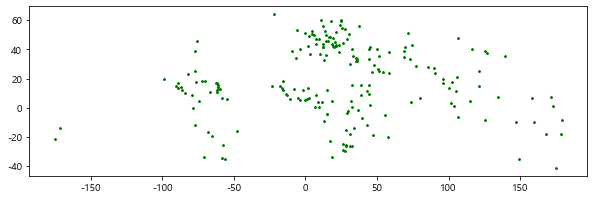

In [46]:
# 수도를 표시한다.
cities.plot(marker='*', color='green', markersize=5, figsize=(10,5));

# Check CRS
cities = cities.to_crs(world.crs)

# 이제 국가 윤곽선을 덮어 씌울 수 있다.

## 방법 1.

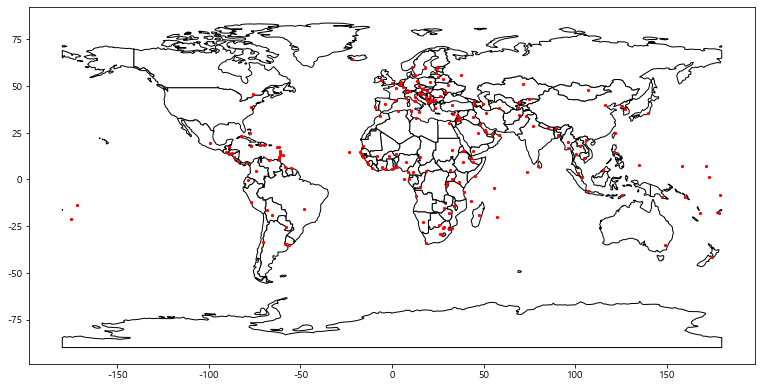

In [49]:
base = world.plot(color='white', edgecolor='k', figsize=(13, 8))

cities.plot(ax=base, marker='o', color='r', markersize=5);

## 방법 2. matplotlib 객체를 사용하기

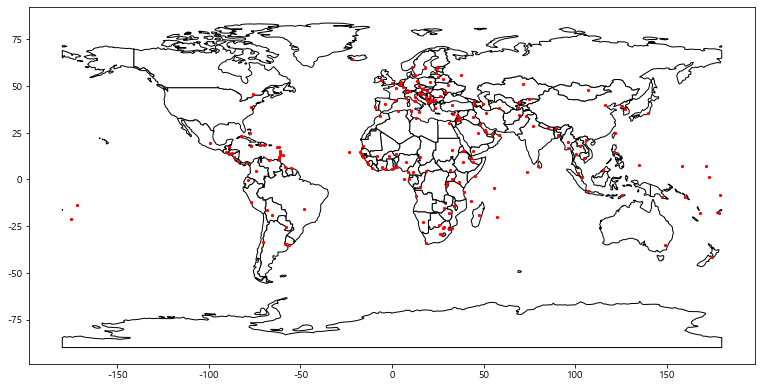

In [52]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(13, 8))

# 방향을 같게 조정
# 이 명령어는 사실 자동으로 수행되기 때문에 적지 않아도 무방
ax.set_aspect('equal')
world.plot(ax=ax, color='white', edgecolor='k')
cities.plot(ax=ax, marker='o', color='r', markersize=5);

## 복수의 layer가 있을 때 layer의 순서를 지정하기
- 복수의 layer가 있을 때 순서를 지정해야 할 때가 있습니다.
- 예를 들어 scatter를 지도 위에 표시해야 하는데 지도 밑에 표시될 때가 있을 수 있습니다.
- 이때는 `zorder`명령어를 통해 이를 조정할 수 있습니다.

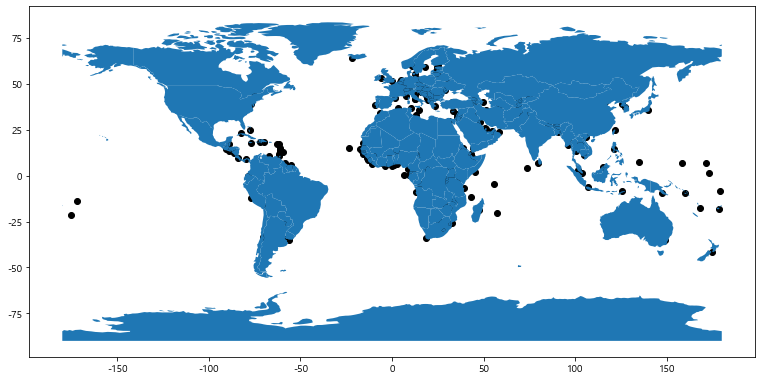

In [63]:
# zorder가 없을 땐 도시의 geometry를 기반으로 한 순서에 따라 세계의 geometry 아래에 표시됩니다.
ax = cities.plot(color='k', figsize=(13, 10))
world.plot(ax=ax);

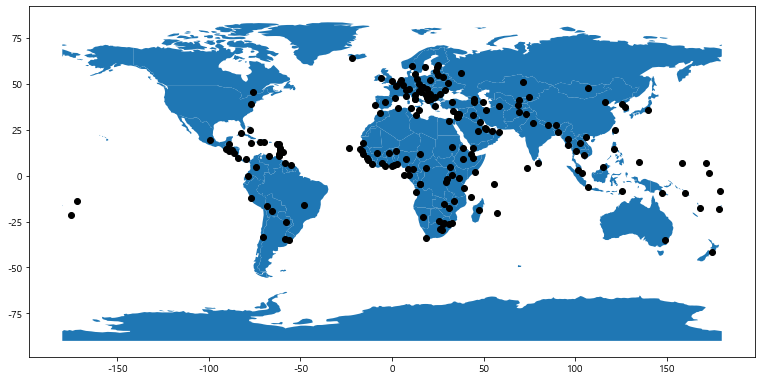

In [65]:
# cities의 zorder를 world의 zorder보다 크게 하여
# cities의 marker를 world위에 표시하게 합니다.
ax = cities.plot(color='k', zorder=2, figsize=(13, 10))
world.plot(ax=ax, zorder=1);

# Pandas Plots
- geopandas의 plotting 방법은 Pandas의 메소드와 조금은 다릅니다.
- 하지만 방식은 동일하게 plot으로 할 수 있으며 plot style은 다음과 같습니다.
    - geo for mapping
    - line for line plots
    - bar or barh for bar plots
    - hist for histogram
    - box for boxplot
    - kde or density for density plots
    - area for area plots
    - scatter for scatter plots
    - hexbin for hexagonal bin plots
    - pie for pie plots

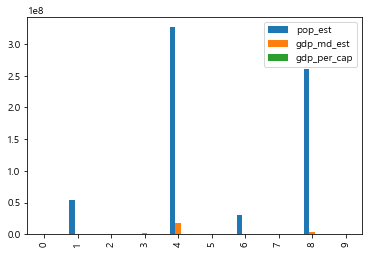

In [71]:
gdf = world.head(10)

gdf.plot(kind='bar');

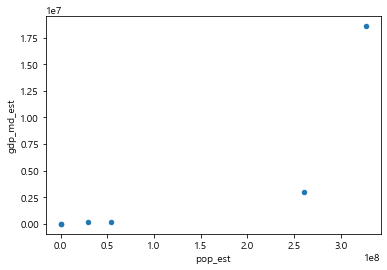

In [72]:
gdf.plot(kind='scatter', x='pop_est', y='gdp_md_est');

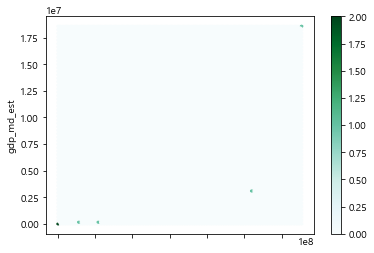

In [73]:
gdf.plot(kind='hexbin', x='pop_est', y='gdp_md_est');